In [1]:
import torch as th
import matplotlib.pyplot as plt

normal = th.distributions.normal.Normal(10, 5)

n = 100
n_nodes = 4
batch_size = 100

x = normal.sample(sample_shape=th.Size([n_nodes, n, batch_size]))

x.shape


torch.Size([4, 100, 100])

In [15]:
import torch as th
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

n = 10


ns_cpu = []
times_cpu = []

k = 9

dev = 'cpu'

for n in range(k):

    start = time.time()

    current_n = 2 ** n

    a = th.rand(size=(current_n, current_n, current_n), dtype=th.float64).to(dev)
    
    for n in tqdm(range(100)):
        a = th.matmul(a, a)

    end = time.time()

    dif_time = end - start

    print('n:', current_n, 'time:', dif_time)

    ns_cpu.append(current_n)
    times_cpu.append(dif_time)

100%|██████████| 100/100 [00:00<00:00, 58999.92it/s]


n: 1 time: 0.004812002182006836


100%|██████████| 100/100 [00:00<00:00, 150765.78it/s]


n: 2 time: 0.003375530242919922


100%|██████████| 100/100 [00:00<00:00, 143346.00it/s]


n: 4 time: 0.003343343734741211


100%|██████████| 100/100 [00:00<00:00, 78500.92it/s]


n: 8 time: 0.004239320755004883


100%|██████████| 100/100 [00:00<00:00, 74038.91it/s]


n: 16 time: 0.004401683807373047


100%|██████████| 100/100 [00:00<00:00, 20648.37it/s]


n: 32 time: 0.007504701614379883


100%|██████████| 100/100 [00:00<00:00, 4195.86it/s]


n: 64 time: 0.027492523193359375


100%|██████████| 100/100 [00:00<00:00, 328.49it/s]


n: 128 time: 0.32501935958862305


100%|██████████| 100/100 [00:03<00:00, 27.48it/s]

n: 256 time: 3.741762399673462


100%|██████████| 100/100 [00:00<00:00, 47608.44it/s]


n: 1 time: 0.006100177764892578


100%|██████████| 100/100 [00:00<00:00, 42439.58it/s]


n: 2 time: 0.004883766174316406


100%|██████████| 100/100 [00:00<00:00, 33995.01it/s]


n: 4 time: 0.008574485778808594


100%|██████████| 100/100 [00:00<00:00, 60107.54it/s]


n: 8 time: 0.005189418792724609


100%|██████████| 100/100 [00:00<00:00, 24668.02it/s]


n: 16 time: 0.007019758224487305


100%|██████████| 100/100 [00:00<00:00, 31119.63it/s]


n: 32 time: 0.006587028503417969


100%|██████████| 100/100 [00:00<00:00, 29574.84it/s]


n: 64 time: 0.016405344009399414


100%|██████████| 100/100 [00:00<00:00, 30275.04it/s]


n: 128 time: 0.11676025390625


100%|██████████| 100/100 [00:00<00:00, 32428.51it/s]


n: 256 time: 0.4512805938720703


100%|██████████| 100/100 [00:00<00:00, 51300.20it/s]


n: 512 time: 3.467996835708618


100%|██████████| 100/100 [00:00<00:00, 137.15it/s]


n: 1024 time: 55.14272379875183


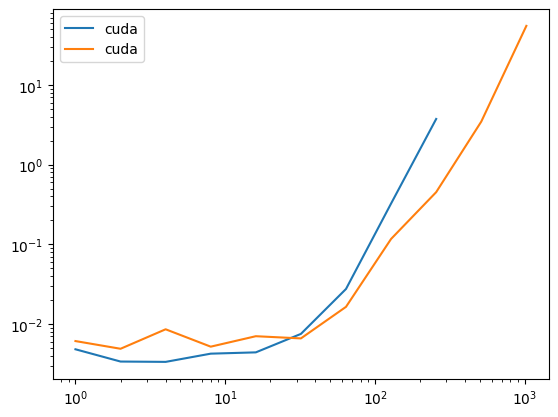

In [16]:
ns_cuda = []
times_cuda = []

dev = 'cuda'

k = 11

for n in range(k):

    start = time.time()

    current_n = 2 ** n

    a = th.rand(size=(current_n, current_n, current_n), dtype=th.float64).to(dev)
    
    for n in tqdm(range(100)):
        a = th.matmul(a, a)

    end = time.time()

    dif_time = end - start

    print('n:', current_n, 'time:', dif_time)

    ns_cuda.append(current_n)
    times_cuda.append(dif_time)



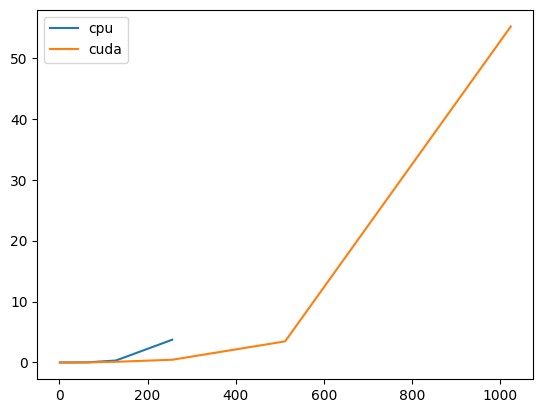

In [18]:
plt.plot(ns_cpu, times_cpu, label='cpu')
plt.plot(ns_cuda, times_cuda, label='cuda')
plt.legend(loc='best')
plt.show()

In [19]:
multiplier = np.array(times_cpu) / np.array(times_cuda)[:-2]

TypeError: unsupported operand type(s) for /: 'list' and 'list'